In [1]:
# Theme of the project is Parkinson Disease Prediction.

# What is Parkinson disease?
    # Parkinson’s disease is a brain disorder that causes unintended or uncontrollable movements, such as shaking, 
    # stiffness, and difficulty with balance and coordination.

# What causes Parkinson's disease?
    # The most prominent signs and symptoms of Parkinson’s disease occur when nerve cells in the basal ganglia, 
    # an area of the brain that controls movement, become impaired and/or die.

In [2]:
# Dataset used in this project is
    # https://archive.ics.uci.edu/dataset/174/parkinsons

In [3]:
# The dataset was created by Max Little of the University of Oxford, in collaboration with the National Centre 
# for Voice and Speech, Denver, Colorado, who recorded the speech signals. 

# The characteristics of these speech signals indicated a disease such as Parkinson's.

# This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease.

In [4]:
# Each column in the table is a particular voice measure.
# Each row corresponds one of 195 voice recording from these individuals ("name" column). 

# The main aim of the data is to discriminate healthy people from those with PD, 
# according to "status" column which is set to 0 for healthy and 1 for PD.

# The data is in ASCII CSV format. 
# There are around six recordings per patient, the name of the patient is identified in the first column.

In [5]:
# Used literature: 
    # https://www.nia.nih.gov/health/parkinsons-disease
    # https://ieeexplore.ieee.org/document/4636708
    # numpy,pandas,matplotlib,sklearn documentation
# Used technologies:
    # jupyter notebook
    # numpy
    # pandas
    # matplotlib
    # sklearn
    # seaborn
    # xgboost

In [6]:
# Dataset Analysis and Visualization 

# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns
import xgboost as xgb

In [7]:
# Load parkinsons dataset into pandas DataFrame

data = pd.read_csv("parkinsons.data")

In [8]:
# Info about dataset columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [9]:
# Dataset's attributes informations:
    # name - ASCII subject name and recording number
    # MDVP:Fo(Hz) - Average vocal fundamental frequency
    # MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
    # MDVP:Flo(Hz) - Minimum vocal fundamental frequency
    # MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
    # measures of variation in fundamental frequency
    # MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
    # NHR,HNR - Two measures of ratio of noise to tonal components in the voice
    # status - Health status of the subject (one) - Parkinson's, (zero) - healthy
    # RPDE,D2 - Two nonlinear dynamical complexity measures
    # DFA - Signal fractal scaling exponent
    # spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

In [10]:
# Exploratory Data Analysis (EDA)

# Display the first few rows of the dataset
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [11]:
# Exploratory Data Analysis (EDA)

# Get basic statistics of the dataset
data.describe()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [12]:
# Value counts of statuses: Health status of the subject (one) - Parkinson's, (zero) - healthy

print(data['status'].value_counts())

1    147
0     48
Name: status, dtype: int64


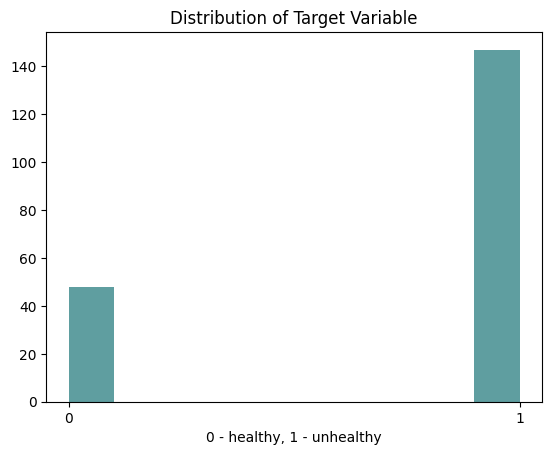

In [13]:
# The result provides a visual representation of how many individuals are classified as 
# healthy (status=0) and how many are classified as unhealthy (status=1) in your dataset. 

plt.title('Distribution of Target Variable')
plt.xticks([0,1])
plt.xlabel('0 - healthy, 1 - unhealthy')
plt.hist([data['status']], color=['cadetblue'])
plt.show()


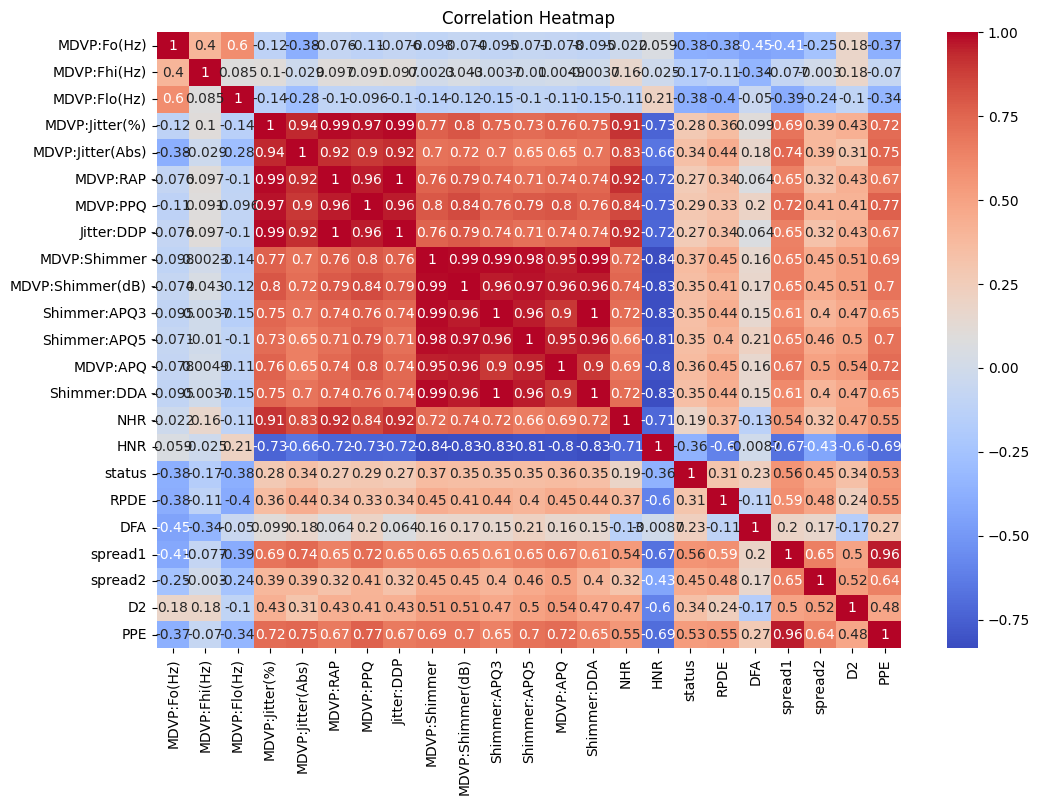

In [14]:
# Visualization of dataset

# Correlation heatmap

# New figure with a specific size. The figsize parameter defines the width and height of the figure in inches.
plt.figure(figsize=(12, 8))

# The resulting heatmap provides a visual representation of the correlations between pairs of numerical features 
# in your dataset.
sns.heatmap(data.corr(numeric_only = True), annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap")
plt.show()

In [15]:
# Project Idea:

# The model can be used to differentiate healthy people from people having Parkinson’s disease. 

# Due to the size of the dataset, I decided to build multiple models and compare their results. 
# Models that are used:
    # 1. Logistic regression 
    # 2. KNearestNeighbors 
    # 3. ensamble BaggingClassifier (KNearestNeighbors) 
    # 4. XGBoost 
    # 5. DecisionTreeClassifier

In [16]:
# Spliting dataset

# I have used sklearn.model_selection.train_test_split() method for spliting dataset into Training/Test/Validation subset.

# In first three models (LogisticRegression, KNearestNeighbors, ensambleOfKNearestNeighbors) I have used this configuration: 

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)

# test_size parameter is set to 0.3
# random_state is set to 7
# random_state is used for randomness of spliting data and to ensure that the data splitting process is reproducible

# Stratify parameter is used to ensure that the class distribution of the target variable is approximately 
# the same in both the training and testing datasets as it is in the original dataset

In [17]:
# In XGBoost and DecisionTreeClassifier I have used this configuration with spliting dataset to training/test/validation subsets:

# First, split the data into train_val and test sets
# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)

# Next, split the train_val set into train and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=7,stratify=y_train_val)


In [18]:
# Load saved models and scalers. (models/...)
model_names = []
models = []
scalers = []

#all_models = {'mn': model_names, 'm': models, 's': scalers}
#print(all_models)

#for model_n, mod, sc in zip(all_models['mn'],all_models['m'],all_models['s']):
#    print(model_n,mod,sc)

In [19]:
# Logistic regression (lbfgs)
with open('../models/log_reg_lbfgs_classifier.model.pickle', 'rb') as scaler_file:
    log_reg_lbfgs_model = pickle.load(scaler_file)
with open('../models/log_reg_lbfgs_classifier.scaler.pickle', 'rb') as scaler_file:
    log_reg_lbfgs_scaler = pickle.load(scaler_file)
model_names.append('Logistic Regression (lbfgs)')
models.append(log_reg_lbfgs_model)
scalers.append(log_reg_lbfgs_scaler)

# Info about training model

# Used two types of solvers (solver='lbfgs' and solver='liblinear')
# Both solvers had same performance, so I used just logistic regression model with 'lbfgs' solver for final comparation

# The best model performance:
# Accuracy: 0.86
# Precision score: 0.89
# Recall score: 0.93
# F1 score: 0.91
# Confusion Matrix:
#  [[10  5]
#  [ 3 41]]
# Classification Report:
#                precision    recall  f1-score   support

#            0       0.77      0.67      0.71        15
#            1       0.89      0.93      0.91        44

#     accuracy                           0.86        59
#    macro avg       0.83      0.80      0.81        59
# weighted avg       0.86      0.86      0.86        59

In [20]:
# K Neighbors Classifier
with open('../models/k_neighbors_classifier.model.pickle', 'rb') as scaler_file:
    k_neighbors_model = pickle.load(scaler_file)
with open('../models/k_neighbors_classifier.scaler.pickle', 'rb') as scaler_file:
    k_neighbors_scaler = pickle.load(scaler_file)
model_names.append('KNeighborsClassifier')
models.append(k_neighbors_model)
scalers.append(k_neighbors_scaler)

# Info about training model

# Used three configuration of KNeighborsClassifier(n_neighbors=k)
# n_neighbors used for testing were n_neighbors=7, n_neighbors=5, n_neighbors=3

# Last one with n_neighbors=3 had the est results (Comparation of these models can be find in 
# 07_k_nearest_neighbors script

# The best model performance:
# Accuracy: 0.85
# Confusion matrix:  [[11  4]
#  [ 5 39]]
# Classification report:                precision    recall  f1-score   support

#            0       0.69      0.73      0.71        15
#            1       0.91      0.89      0.90        44

#     accuracy                           0.85        59
#    macro avg       0.80      0.81      0.80        59
# weighted avg       0.85      0.85      0.85        59

In [21]:
# Ensemble K Neighbors Classifier
with open('../models/ensamble_k_neighbors_classifier.model.pickle', 'rb') as scaler_file:
    ensamble_k_neighbors_model = pickle.load(scaler_file)
with open('../models/ensamble_k_neighbors_classifier.scaler.pickle', 'rb') as scaler_file:
    ensamble_k_neighbors_scaler = pickle.load(scaler_file)
model_names.append('Ensemble KNeighborsClassifier')
models.append(ensamble_k_neighbors_model)
scalers.append(ensamble_k_neighbors_scaler)

# Info about training model

# In this model I have used Oversampling (Random Over-Sampling)

# ros = RandomOverSampler(random_state=7)
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# ensamble of KNeighborsClassifier model
# base_estimator = KNeighborsClassifier(n_neighbors={3,5,7},metric='cosine')  
# model_ensamble_knn = ensemble.BaggingClassifier(estimator=base_estimator, n_estimators={150,200,300}, random_state=7)

# The best one was base_estimator with n_neighbors = 3 and ensemble with n_estimators = 150

# The best model performance

# Accuracy: 0.80
# Confusion matrix:  [[12  3]
#  [ 9 35]]
# Classification report:                precision    recall  f1-score   support

#            0       0.57      0.80      0.67        15
#            1       0.92      0.80      0.85        44

#     accuracy                           0.80        59
#    macro avg       0.75      0.80      0.76        59
# weighted avg       0.83      0.80      0.81        59

In [22]:
# XgBoost
with open('../models/xgboost.model.pickle', 'rb') as scaler_file:
    xgboost_model = pickle.load(scaler_file)
with open('../models/xgboost.scaler.pickle', 'rb') as scaler_file:
    xgboost_scaler = pickle.load(scaler_file)
model_names.append('XgBoost')
models.append(xgboost_model)
scalers.append(xgboost_scaler)

# Info about training model

# I have used RandomizedSearchCV (sklearn.model_selection) for performing random search using cross-validation  
# Result was finding best subset of hyperparameters -> that leads to the best model of provided parameters.

# Provided parameters were: 
# param_dist = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': range(100, 1000, 100),
#     'max_depth': [3, 4, 5, 6],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0],
#     'gamma': [0, 0.1, 0.2],
# }

# The best parameters: learning_rate=0.2, n_estimators=500, max_depth=5, subsample=0.9, colsample_bytree=1.0, gamma=0.1

# The best model performance

# Accuracy: 0.90
# Precision score: 0.91
# Recall score: 0.95
# F1 score: 0.93
# Confusion Matrix:
#  [[11  4]
#  [ 2 42]]
# Classification Report:
#                precision    recall  f1-score   support

#            0       0.85      0.73      0.79        15
#            1       0.91      0.95      0.93        44

#     accuracy                           0.90        59
#    macro avg       0.88      0.84      0.86        59
# weighted avg       0.90      0.90      0.90        59


In [23]:
# # Decision Tree
# with open('../models/decision_tree.model.pickle', 'rb') as scaler_file:
#     decision_tree_model = pickle.load(scaler_file)
# with open('../models/decision_tree.scaler.pickle', 'rb') as scaler_file:
#     decision_tree_scaler = pickle.load(scaler_file)
# model_names.append('DecisionTree')
# models.append(decision_tree_model)
# scalers.append(decision_tree_scaler)

# Info about training model

# I have used GridSearchCV() for finding best subset of hyperparameters

# Provided parameters were: 
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 3, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# The best parameters: criterion = 'entropy', max_depth = None, min_samples_leaf = 1, min_samples_split = 2

# The best model performance

# Test Accuracy: 0.97
# Test Confusion Matrix:
#  [[13  2]
#  [ 0 44]]
# Test Classification Report:
#                precision    recall  f1-score   support

#            0       1.00      0.87      0.93        15
#            1       0.96      1.00      0.98        44

#     accuracy                           0.97        59
#    macro avg       0.98      0.93      0.95        59
# weighted avg       0.97      0.97      0.97        59

In [24]:
# Separate features (X) and target (y)
X = data.drop(['name', 'status'], axis=1)  # Remove 'name' and 'status' columns from feature variable

y = data['status']  # Target variable

_, X_test, _, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)

X.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [25]:
# Dictionary to store results

results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-Score": [], "Confusion-Matrix": [], "ROC-AUC": []}

all_models = {'model_names': model_names, 'models': models, 'scalers': scalers}

for model_name, model, scaler in zip(all_models['model_names'],all_models['models'],all_models['scalers']):
    print('=======================================================================')
    print(model_name,model,scaler)
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    prec_score = precision_score(y_test,y_pred)
    rec_score = recall_score(y_test,y_pred)
    f1score = f1_score(y_test,y_pred)
    conf_matrix = confusion_matrix(y_test,y_pred)
    report = classification_report(y_test, y_pred)
    
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision score: {prec_score:.2f}")
    print(f"Recall score: {rec_score:.2f}")
    print(f"F1 score: {f1score:.2f}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", report)
    
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(prec_score)
    results["Recall"].append(rec_score)
    results["F1-Score"].append(f1score)
    results["Confusion-Matrix"].append(conf_matrix)
    results["ROC-AUC"].append((fpr,tpr,roc_auc))


Logistic Regression (lbfgs) LogisticRegression() StandardScaler()
Accuracy: 0.86
Precision score: 0.89
Recall score: 0.93
F1 score: 0.91
Confusion Matrix:
 [[10  5]
 [ 3 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.67      0.71        15
           1       0.89      0.93      0.91        44

    accuracy                           0.86        59
   macro avg       0.83      0.80      0.81        59
weighted avg       0.86      0.86      0.86        59

KNeighborsClassifier KNeighborsClassifier(n_neighbors=3) StandardScaler()
Accuracy: 0.85
Precision score: 0.91
Recall score: 0.89
F1 score: 0.90
Confusion Matrix:
 [[11  4]
 [ 5 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71        15
           1       0.91      0.89      0.90        44

    accuracy                           0.85        59
   macro avg       0.80      0.81      0.80      

In [26]:
results_df = pd.DataFrame(results)

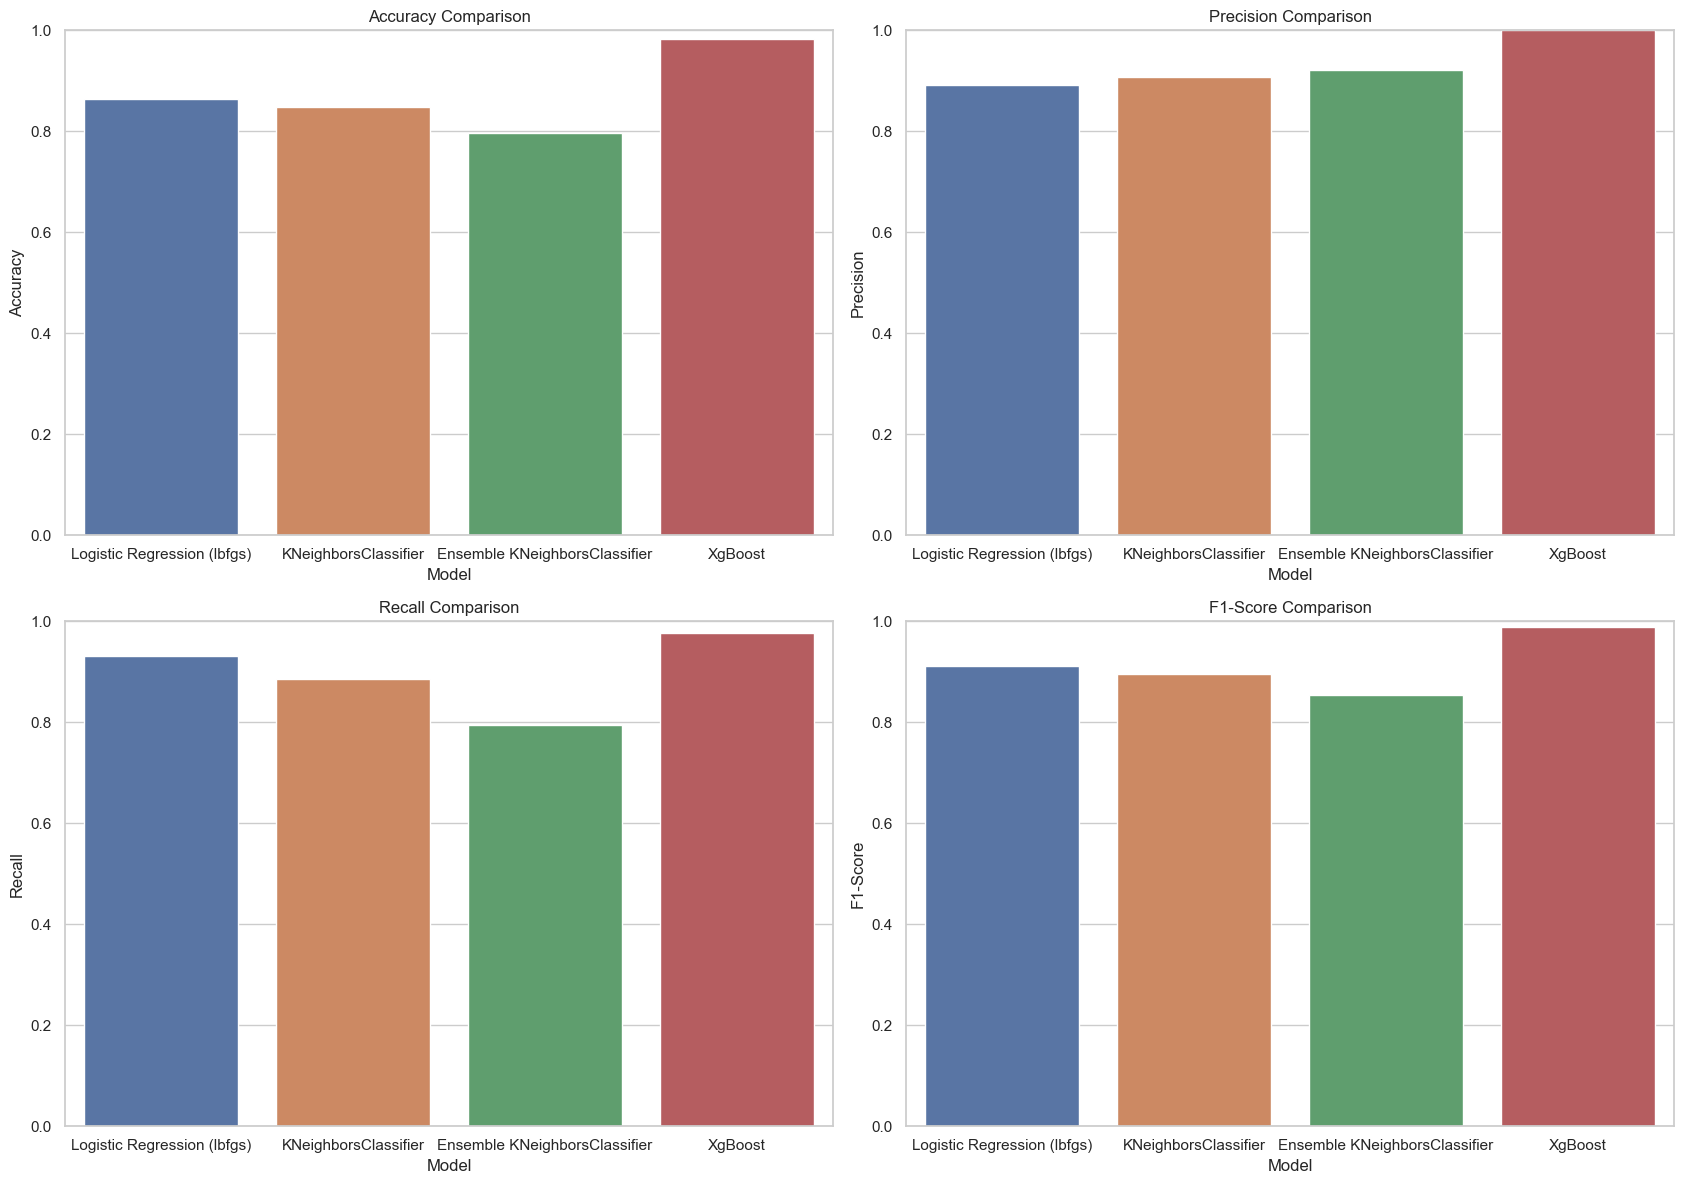

In [27]:
# Visualization of models comparation
# Set the style of the plots (optional)
sns.set(style="whitegrid")

# Create subplots (you can customize the layout)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(17, 12))

# Plot accuracy
sns.barplot(x="Model", y="Accuracy", data=results_df, ax=axes[0, 0])
axes[0, 0].set_title("Accuracy Comparison")
axes[0, 0].set_ylim(0, 1)

# Plot precision
sns.barplot(x="Model", y="Precision", data=results_df, ax=axes[0, 1])
axes[0, 1].set_title("Precision Comparison")
axes[0, 1].set_ylim(0, 1)

# Plot recall
sns.barplot(x="Model", y="Recall", data=results_df, ax=axes[1, 0])
axes[1, 0].set_title("Recall Comparison")
axes[1, 0].set_ylim(0, 1)

# Plot F1-Score
sns.barplot(x="Model", y="F1-Score", data=results_df, ax=axes[1, 1])
axes[1, 1].set_title("F1-Score Comparison")
axes[1, 1].set_ylim(0, 1)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

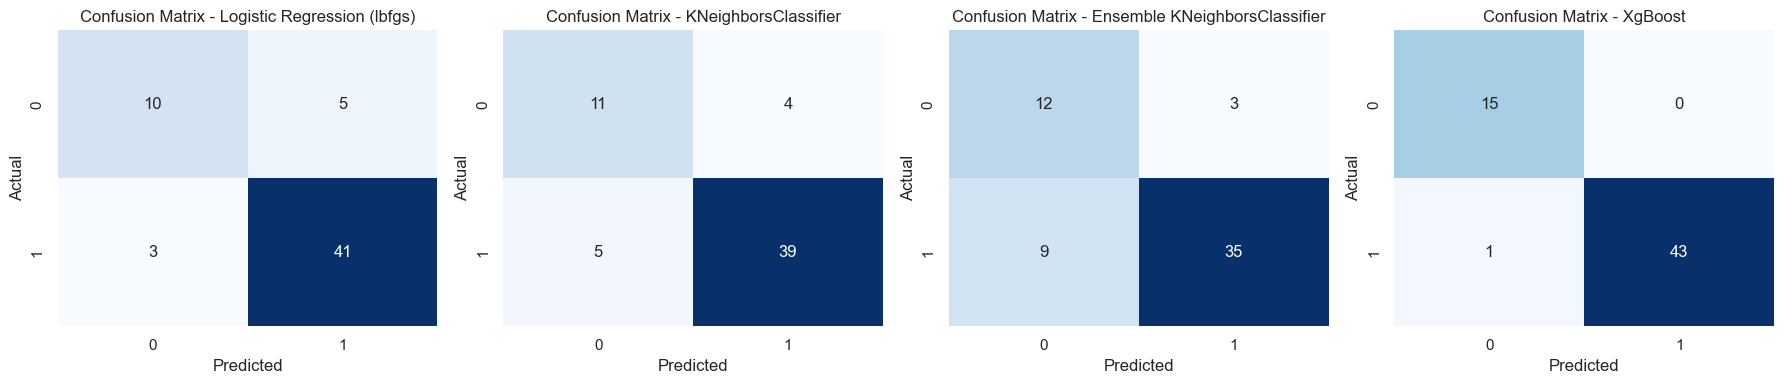

In [28]:
num_models = 4
fig, axes = plt.subplots(1, num_models, figsize=(18, 4))  # Adjust figsize as needed

for i, (model_name, cm) in enumerate(zip(results['Model'],results['Confusion-Matrix'])):
    # Plot the confusion matrix heatmap on the current axis
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {model_name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


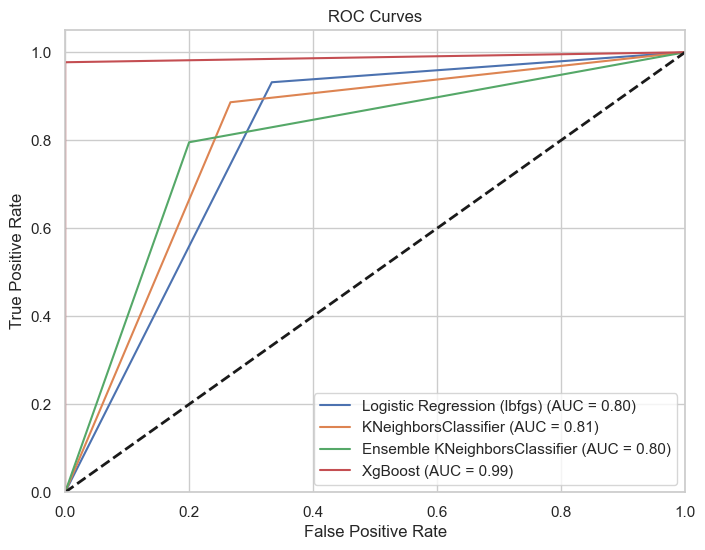

In [29]:
# Roc Curve - AUC
plt.figure(figsize=(8, 6))
for model_name, roc_auc_tuple in zip(results['Model'],results['ROC-AUC']):
    fpr, tpr, roc_auc = roc_auc_tuple
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

In [30]:
# Conclusion

# The best model is XgBoost Classifier
# Accuracy: 0.98
# Precision score: 0.98
# Recall score: 0.99
# F1 score: 0.99
# Confusion Matrix:
#  [[ 45   3]
#  [  1 146]]
# Classification Report:
#                precision    recall  f1-score   support

#            0       0.98      0.94      0.96        48
#            1       0.98      0.99      0.99       147

#     accuracy                           0.98       195
#    macro avg       0.98      0.97      0.97       195
# weighted avg       0.98      0.98      0.98       195



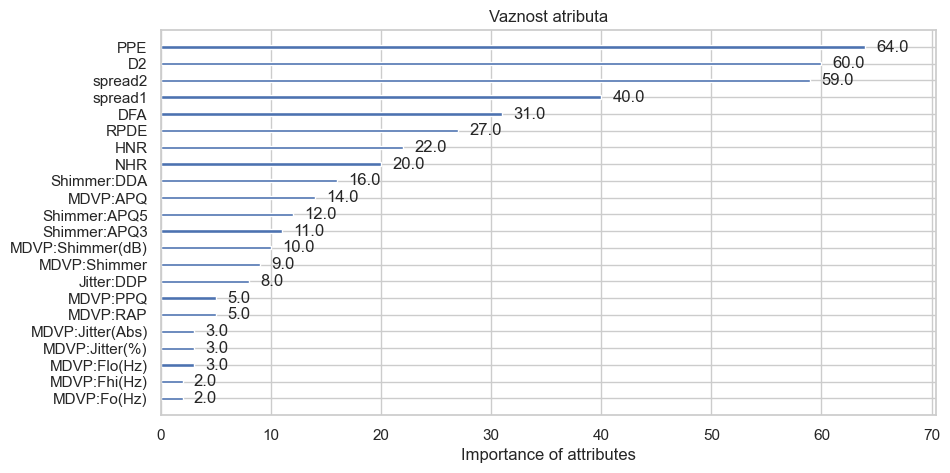

In [31]:
# Importance of attributes in XgBoost
plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 1, 1)
xgb.plot_importance(xgboost_model, ax= ax, xlabel='Importance of attributes', ylabel=None, title='Vaznost atributa')
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels(X.keys())
plt.show()

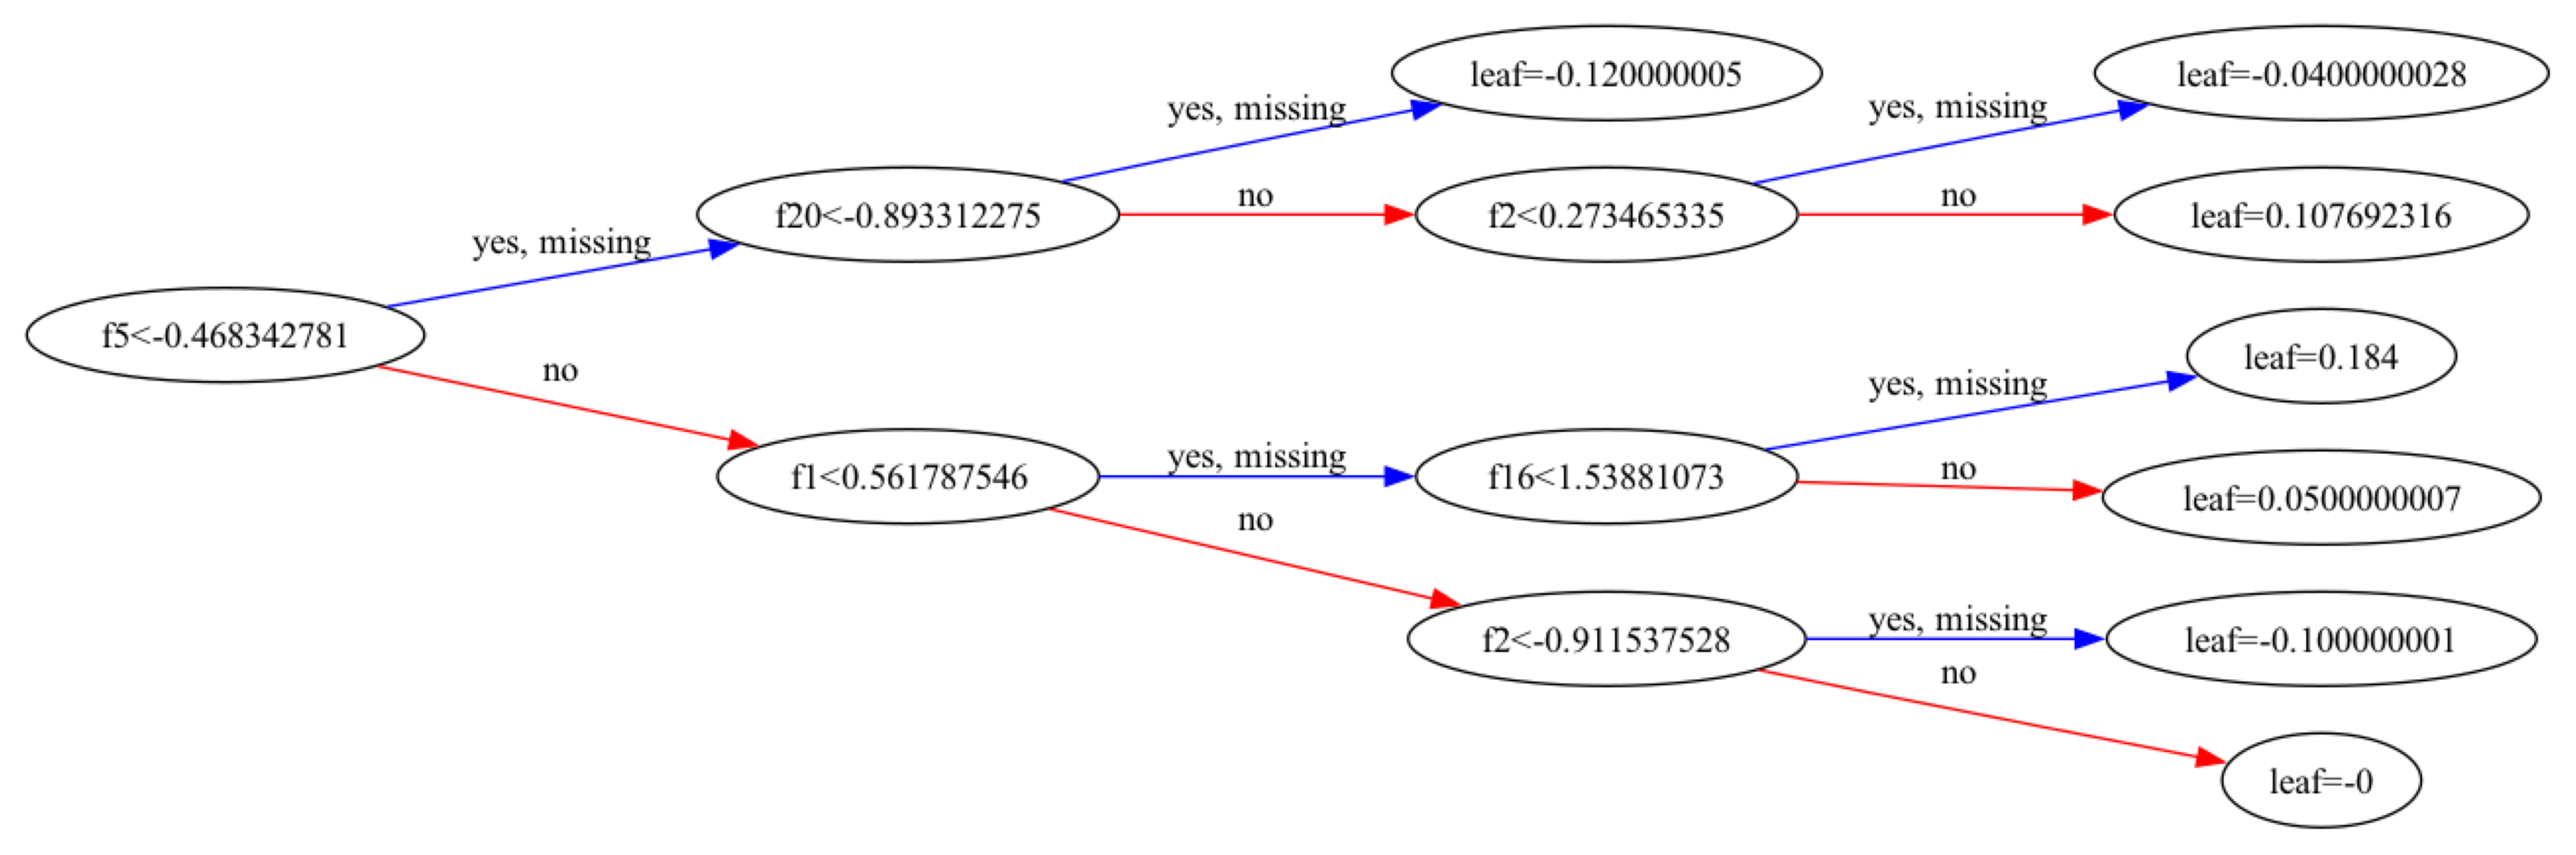

In [32]:
# Visualizing xgboost model with graphviz library

plt.figure(figsize=(20, 15), dpi=180)
ax = plt.subplot(1, 1, 1)
xgb.plot_tree(xgboost_model, ax=ax, rankdir='LR')
plt.show()

In [33]:
# Problems I have encountered during this project

# In final comparation of models, I had problem with DecisionTreeClassifier.
# Even if model had good results during validation and testing. When I imported model in this final script
# I got Warning (UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names)

# And result is that model has really bad performance because of this problem.

# Next steps: Find out what was the problem and solve it.